# EDA
- Updated 2023.01.24
- Written by shyeon

### Preparing to run the code

In [1]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

curr_path = Path().absolute()
os.chdir(curr_path.parent)  # change working directory to parent path


### Loading the dataset
- value_df: (156232, 66)

In [2]:
with open("data/processed/values.pickle","rb") as f:
    value_df = pickle.load(f)

print("Data type:", type(value_df))
print("Data size:",value_df.values.shape)
value_df.head()

Data type: <class 'pandas.core.frame.DataFrame'>
Data size: (156232, 66)


,NRn261_TxLOSS_[2077891CH]_TESTPOINT3,NRn261_TxLOSS_[2077891CH]_TESTPOINT2,NRn261_TxLOSS_[2077891CH]_TESTPOINT1,NRn261_TxLOSS_[2077891CH]_TESTPOINT0,NRn260_TxLOSS_[2254147CH]_TESTPOINT3,NRn260_TxLOSS_[2254147CH]_TESTPOINT2,NRn260_TxLOSS_[2254147CH]_TESTPOINT1,NRn260_TxLOSS_[2254147CH]_TESTPOINT0,Battery Level Detect,NRn261[2077891] BEAM16_RX_Estimated Sensitivity-75dBm,...,NRn260[2254147] BEAM31_RX_Estimated Sensitivity-75dBm,NRn260[2254147] BEAM31_Tx_QPSK_POWER,NRn260[2254147] BEAM159_TX_QPSK_ACLR_UPPER,NRn260[2254147] BEAM159_TX_QPSK_FreqError,NRn260[2254147] BEAM159_Tx_QPSK_POWER,NRn260[2254147] BEAM159_TX_QPSK_EVM,NRn260[2254147] BEAM159_RX_Estimated Sensitivity-75dBm,NRn260[2254147] BEAM159_TX_QPSK_ACLR_LOWER,NRn260[2254147] BEAM159_TX_QPSK_IQoffset,RF TEST-TIME
0,-50.21,-43.32,-47.31,-43.43,-49.92,-48.45,-53.03,-50.66,3.83,-97.75,...,-93.89,20.17,-33.93,-2.42,20.39,6.35,-94.92,-35.72,-54.69,12.0
1,-50.20,-43.53,-48.08,-43.70,-51.05,-48.84,-53.61,-50.72,3.86,-99.66,...,-94.95,20.33,-32.68,-1.78,20.60,7.33,-95.56,-34.01,-61.33,12.0
2,-49.79,-44.04,-48.74,-44.28,-51.60,-48.80,-53.75,-50.68,3.87,-100.30,...,-95.43,20.90,-33.31,-0.82,21.21,7.16,-96.74,-34.42,-54.42,12.0
3,-49.91,-45.00,-49.18,-45.34,-52.60,-49.71,-54.86,-51.91,3.89,-99.38,...,-92.71,20.80,-33.52,-2.22,20.90,7.08,-94.19,-35.10,-54.82,12.0
4,-50.11,-44.37,-49.37,-45.00,-52.03,-49.30,-54.69,-52.33,3.88,-98.82,...,-92.81,21.07,-33.27,-2.06,20.01,7.14,-93.17,-34.63,-52.27,12.0


### Correlation

In [3]:
corr_df = value_df.corr(method="pearson") # 'pearson','spearman', 'kendall'
corr = corr_df.values

<AxesSubplot: >

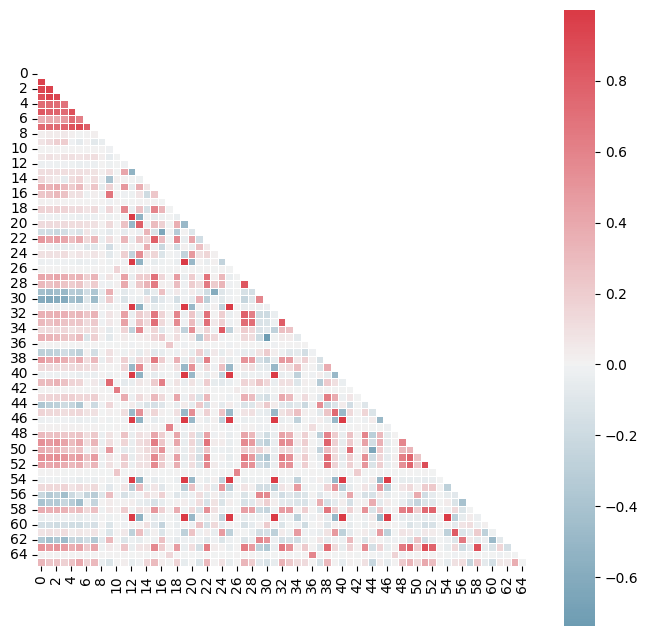

In [4]:
mask = np.triu(np.ones_like(corr, dtype=bool))  # 역 삼각 모양 마스크
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5)